### Importación de bibliotecas necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox

## Extraccion de los datos

### 2015

In [2]:
df_2015 = pd.read_csv("../data/2015.csv")
print(df_2015.head())  


       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938           

In [3]:
df_2015['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [4]:
df_2015['Country'].unique()

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel',
       'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil',
       'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates',
       'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama',
       'Germany', 'Chile', 'Qatar', 'France', 'Argentina',
       'Czech Republic', 'Uruguay', 'Colombia', 'Thailand',
       'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname',
       'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan',
       'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy',
       'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia',
       'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia',
       'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus',
       'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong',
       'Estonia', 'Indonesi

In [5]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [6]:
df_2015[df_2015['Country'] == 'Lithuania']


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
55,Lithuania,Central and Eastern Europe,56,5.833,0.03843,1.14723,1.25745,0.73128,0.21342,0.01031,0.02641,2.44649


In [7]:
null_values= df_2015.isnull().sum()
print("Valores nulos:\n", null_values)


Valores nulos:
 Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


In [8]:
duplicados = df_2015.duplicated()

print(df_2015[duplicados])


Empty DataFrame
Columns: [Country, Region, Happiness Rank, Happiness Score, Standard Error, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, Dystopia Residual]
Index: []


### 2016

In [9]:
df_2016 = pd.read_csv("../data/2016.csv")
print(df_2016.head())  


       Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Europe               4            7.498   
4      Finland  Western Europe               5            7.413   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                

In [10]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [11]:
df_2016['Country'].unique()

array(['Denmark', 'Switzerland', 'Iceland', 'Norway', 'Finland', 'Canada',
       'Netherlands', 'New Zealand', 'Australia', 'Sweden', 'Israel',
       'Austria', 'United States', 'Costa Rica', 'Puerto Rico', 'Germany',
       'Brazil', 'Belgium', 'Ireland', 'Luxembourg', 'Mexico',
       'Singapore', 'United Kingdom', 'Chile', 'Panama', 'Argentina',
       'Czech Republic', 'United Arab Emirates', 'Uruguay', 'Malta',
       'Colombia', 'France', 'Thailand', 'Saudi Arabia', 'Taiwan',
       'Qatar', 'Spain', 'Algeria', 'Guatemala', 'Suriname', 'Kuwait',
       'Bahrain', 'Trinidad and Tobago', 'Venezuela', 'Slovakia',
       'El Salvador', 'Malaysia', 'Nicaragua', 'Uzbekistan', 'Italy',
       'Ecuador', 'Belize', 'Japan', 'Kazakhstan', 'Moldova', 'Russia',
       'Poland', 'South Korea', 'Bolivia', 'Lithuania', 'Belarus',
       'North Cyprus', 'Slovenia', 'Peru', 'Turkmenistan', 'Mauritius',
       'Libya', 'Latvia', 'Cyprus', 'Paraguay', 'Romania', 'Estonia',
       'Jamaica', 'Croa

In [12]:
null_values= df_2016.isnull().sum()
print("Valores nulos:\n", null_values)

Valores nulos:
 Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


In [13]:
duplicados = df_2016.duplicated()

print(df_2016[duplicados])


Empty DataFrame
Columns: [Country, Region, Happiness Rank, Happiness Score, Lower Confidence Interval, Upper Confidence Interval, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, Dystopia Residual]
Index: []


### 2017

In [14]:
df_2017 = pd.read_csv("../data/2017.csv")
print(df_2017.head())  


       Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0       Norway               1            7.537      7.594445     7.479556   
1      Denmark               2            7.522      7.581728     7.462272   
2      Iceland               3            7.504      7.622030     7.385970   
3  Switzerland               4            7.494      7.561772     7.426227   
4      Finland               5            7.469      7.527542     7.410458   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   
3                  1.564980  1.516912                  0.858131  0.620071   
4                  1.443572  1.540247                  0.809158  0.617951   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
0 

In [15]:
df_2017["Country"].unique()

array(['Norway', 'Denmark', 'Iceland', 'Switzerland', 'Finland',
       'Netherlands', 'Canada', 'New Zealand', 'Sweden', 'Australia',
       'Israel', 'Costa Rica', 'Austria', 'United States', 'Ireland',
       'Germany', 'Belgium', 'Luxembourg', 'United Kingdom', 'Chile',
       'United Arab Emirates', 'Brazil', 'Czech Republic', 'Argentina',
       'Mexico', 'Singapore', 'Malta', 'Uruguay', 'Guatemala', 'Panama',
       'France', 'Thailand', 'Taiwan Province of China', 'Spain', 'Qatar',
       'Colombia', 'Saudi Arabia', 'Trinidad and Tobago', 'Kuwait',
       'Slovakia', 'Bahrain', 'Malaysia', 'Nicaragua', 'Ecuador',
       'El Salvador', 'Poland', 'Uzbekistan', 'Italy', 'Russia', 'Belize',
       'Japan', 'Lithuania', 'Algeria', 'Latvia', 'South Korea',
       'Moldova', 'Romania', 'Bolivia', 'Turkmenistan', 'Kazakhstan',
       'North Cyprus', 'Slovenia', 'Peru', 'Mauritius', 'Cyprus',
       'Estonia', 'Belarus', 'Libya', 'Turkey', 'Paraguay',
       'Hong Kong S.A.R., China', '

In [16]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [17]:
null_values= df_2017.isnull().sum()
print("Valores nulos:\n", null_values)

Valores nulos:
 Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64


In [18]:
duplicados = df_2017.duplicated()

print(df_2017[duplicados])


Empty DataFrame
Columns: [Country, Happiness.Rank, Happiness.Score, Whisker.high, Whisker.low, Economy..GDP.per.Capita., Family, Health..Life.Expectancy., Freedom, Generosity, Trust..Government.Corruption., Dystopia.Residual]
Index: []


### 2018

In [19]:
df_2018 = pd.read_csv("../data/2018.csv")
print(df_2018.head())  


   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   
1             2            Norway  7.594           1.456           1.582   
2             3           Denmark  7.555           1.351           1.590   
3             4           Iceland  7.495           1.343           1.644   
4             5       Switzerland  7.487           1.420           1.549   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.874                         0.681       0.202   
1                    0.861                         0.686       0.286   
2                    0.868                         0.683       0.284   
3                    0.914                         0.677       0.353   
4                    0.927                         0.660       0.256   

   Perceptions of corruption  
0                      0.393  
1                      0.340  
2                

In [20]:
df_2018["Country or region"].unique()

array(['Finland', 'Norway', 'Denmark', 'Iceland', 'Switzerland',
       'Netherlands', 'Canada', 'New Zealand', 'Sweden', 'Australia',
       'United Kingdom', 'Austria', 'Costa Rica', 'Ireland', 'Germany',
       'Belgium', 'Luxembourg', 'United States', 'Israel',
       'United Arab Emirates', 'Czech Republic', 'Malta', 'France',
       'Mexico', 'Chile', 'Taiwan', 'Panama', 'Brazil', 'Argentina',
       'Guatemala', 'Uruguay', 'Qatar', 'Saudi Arabia', 'Singapore',
       'Malaysia', 'Spain', 'Colombia', 'Trinidad & Tobago', 'Slovakia',
       'El Salvador', 'Nicaragua', 'Poland', 'Bahrain', 'Uzbekistan',
       'Kuwait', 'Thailand', 'Italy', 'Ecuador', 'Belize', 'Lithuania',
       'Slovenia', 'Romania', 'Latvia', 'Japan', 'Mauritius', 'Jamaica',
       'South Korea', 'Northern Cyprus', 'Russia', 'Kazakhstan', 'Cyprus',
       'Bolivia', 'Estonia', 'Paraguay', 'Peru', 'Kosovo', 'Moldova',
       'Turkmenistan', 'Hungary', 'Libya', 'Philippines', 'Honduras',
       'Belarus', 'Turkey

In [21]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [22]:
null_values= df_2018.isnull().sum()
print("Valores nulos:\n", null_values)

Valores nulos:
 Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64


In [23]:
# Mostrar filas con al menos un valor nulo en 2015
null_rows = df_2018[df_2018.isnull().any(axis=1)]
print("Filas con valores nulos en 2018:")
print(null_rows)

Filas con valores nulos en 2018:
    Overall rank     Country or region  Score  GDP per capita  Social support  \
19            20  United Arab Emirates  6.774           2.096           0.776   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
19                     0.67                         0.284       0.186   

    Perceptions of corruption  
19                        NaN  


In [24]:
duplicados = df_2018.duplicated()

print(df_2018[duplicados])

Empty DataFrame
Columns: [Overall rank, Country or region, Score, GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption]
Index: []


### 2019

In [25]:
df_2019 = pd.read_csv("../data/2019.csv")
print(df_2019.head())  


   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                

In [26]:
df_2019["Country or region"].unique()

array(['Finland', 'Denmark', 'Norway', 'Iceland', 'Netherlands',
       'Switzerland', 'Sweden', 'New Zealand', 'Canada', 'Austria',
       'Australia', 'Costa Rica', 'Israel', 'Luxembourg',
       'United Kingdom', 'Ireland', 'Germany', 'Belgium', 'United States',
       'Czech Republic', 'United Arab Emirates', 'Malta', 'Mexico',
       'France', 'Taiwan', 'Chile', 'Guatemala', 'Saudi Arabia', 'Qatar',
       'Spain', 'Panama', 'Brazil', 'Uruguay', 'Singapore', 'El Salvador',
       'Italy', 'Bahrain', 'Slovakia', 'Trinidad & Tobago', 'Poland',
       'Uzbekistan', 'Lithuania', 'Colombia', 'Slovenia', 'Nicaragua',
       'Kosovo', 'Argentina', 'Romania', 'Cyprus', 'Ecuador', 'Kuwait',
       'Thailand', 'Latvia', 'South Korea', 'Estonia', 'Jamaica',
       'Mauritius', 'Japan', 'Honduras', 'Kazakhstan', 'Bolivia',
       'Hungary', 'Paraguay', 'Northern Cyprus', 'Peru', 'Portugal',
       'Pakistan', 'Russia', 'Philippines', 'Serbia', 'Moldova', 'Libya',
       'Montenegro', 'Tajikis

In [27]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [28]:
null_values= df_2019.isnull().sum()
print("Valores nulos:\n", null_values)

Valores nulos:
 Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


In [29]:
duplicados = df_2019.duplicated()

print(df_2018[duplicados])

Empty DataFrame
Columns: [Overall rank, Country or region, Score, GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption]
Index: []


## Datos combinados 

### Unir los datasets por columnas en comun 

In [30]:
print('Columnas 2015:', df_2015.columns.tolist())
print('Columnas 2016:', df_2016.columns.tolist())
print('Columnas 2017:', df_2017.columns.tolist())
print('Columnas 2018:', df_2018.columns.tolist())
print('Columnas 2019:', df_2019.columns.tolist())

Columnas 2015: ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
Columnas 2016: ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
Columnas 2017: ['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']
Columnas 2018: ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
Columnas 2019: ['Overall rank', 'Country or re

In [31]:
# Renombrar columnas
df_2015 = df_2015.rename(columns={
    'Country': 'Country_or_region',
    'Family': 'Social_support',
    'Happiness Rank': 'Happiness_Rank',
    'Happiness Score': 'Happiness_Score',
    'Economy (GDP per Capita)': 'GDP_per_capita',
    'Health (Life Expectancy)': 'Healthy_life_expectancy',
    'Trust (Government Corruption)': 'Perceptions_of_corruption'
})
df_2016 = df_2016.rename(columns={
    'Country': 'Country_or_region',
    'Family': 'Social_support',
    'Happiness Rank': 'Happiness_Rank',
    'Happiness Score': 'Happiness_Score',
    'Economy (GDP per Capita)': 'GDP_per_capita',
    'Health (Life Expectancy)': 'Healthy_life_expectancy',
    'Trust (Government Corruption)': 'Perceptions_of_corruption'
})
df_2017 = df_2017.rename(columns={
    'Country': 'Country_or_region',
    'Happiness.Score': 'Happiness_Score',
    'Family': 'Social_support',
    'Happiness.Rank': 'Happiness_Rank',
    'Economy..GDP.per.Capita.': 'GDP_per_capita',
    'Health..Life.Expectancy.': 'Healthy_life_expectancy',
    'Trust..Government.Corruption.': 'Perceptions_of_corruption',
    'Dystopia.Residual': 'Dystopia_Residual'
})
df_2018 = df_2018.rename(columns={
    'Country or region': 'Country_or_region',
    'Score': 'Happiness_Score',
    'Social support': 'Social_support',
    'Overall rank': 'Happiness_Rank',
    'GDP per capita': 'GDP_per_capita',
    'Healthy life expectancy': 'Healthy_life_expectancy',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Perceptions_of_corruption'
})
df_2019 = df_2019.rename(columns={
    'Country or region': 'Country_or_region',
    'Social support': 'Social_support',
    'Score': 'Happiness_Score',
    'Overall rank': 'Happiness_Rank',
    'GDP per capita': 'GDP_per_capita',
    'Healthy life expectancy': 'Healthy_life_expectancy',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Perceptions_of_corruption'
})

# Verificar columnas renombradas
print('Columnas 2015 (renombradas):', df_2015.columns.tolist())
print('Columnas 2016 (renombradas):', df_2016.columns.tolist())
print('Columnas 2017 (renombradas):', df_2017.columns.tolist())
print('Columnas 2018 (renombradas):', df_2018.columns.tolist())
print('Columnas 2019 (renombradas):', df_2019.columns.tolist())

Columnas 2015 (renombradas): ['Country_or_region', 'Region', 'Happiness_Rank', 'Happiness_Score', 'Standard Error', 'GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 'Freedom', 'Perceptions_of_corruption', 'Generosity', 'Dystopia Residual']
Columnas 2016 (renombradas): ['Country_or_region', 'Region', 'Happiness_Rank', 'Happiness_Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 'Freedom', 'Perceptions_of_corruption', 'Generosity', 'Dystopia Residual']
Columnas 2017 (renombradas): ['Country_or_region', 'Happiness_Rank', 'Happiness_Score', 'Whisker.high', 'Whisker.low', 'GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 'Freedom', 'Generosity', 'Perceptions_of_corruption', 'Dystopia_Residual']
Columnas 2018 (renombradas): ['Happiness_Rank', 'Country_or_region', 'Happiness_Score', 'GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 'Freedom', 'Generosity', 'Perceptions_of_cor

In [32]:
# Encontrar columnas comunes
common_columns = list(set(df_2015.columns) & set(df_2016.columns) & set(df_2017.columns) & 
                      set(df_2018.columns) & set(df_2019.columns))
print('Columnas comunes:', common_columns)



Columnas comunes: ['Perceptions_of_corruption', 'Freedom', 'Happiness_Score', 'Country_or_region', 'GDP_per_capita', 'Happiness_Rank', 'Generosity', 'Healthy_life_expectancy', 'Social_support']


In [33]:
# Agregar columna de año
df_2015['Year'] = 2015
df_2016['Year'] = 2016
df_2017['Year'] = 2017
df_2018['Year'] = 2018
df_2019['Year'] = 2019

selected_features =  ['Freedom', 'Generosity', 'Happiness_Rank', 'Country_or_region', 'Perceptions_of_corruption', 'GDP_per_capita', 'Healthy_life_expectancy', 'Happiness_Score', 'Social_support']

# Combinar DataFrames
df = pd.concat([
    df_2015[selected_features + ['Year']],
    df_2016[selected_features + ['Year']],
    df_2017[selected_features + ['Year']],
    df_2018[selected_features + ['Year']],
    df_2019[selected_features + ['Year']]
], ignore_index=True)

# Guardar datos combinados
df.head()

,Freedom,Generosity,Happiness_Rank,Country_or_region,Perceptions_of_corruption,GDP_per_capita,Healthy_life_expectancy,Happiness_Score,Social_support,Year
0,0.66557,0.29678,1,Switzerland,0.41978,1.39651,0.94143,7.587,1.34951,2015
1,0.62877,0.43630,2,Iceland,0.14145,1.30232,0.94784,7.561,1.40223,2015
2,0.64938,0.34139,3,Denmark,0.48357,1.32548,0.87464,7.527,1.36058,2015
3,0.66973,0.34699,4,Norway,0.36503,1.45900,0.88521,7.522,1.33095,2015
4,0.63297,0.45811,5,Canada,0.32957,1.32629,0.90563,7.427,1.32261,2015


### Nulos y duplicados 

In [34]:
null_values= df.isnull().sum()
print("Valores nulos:\n", null_values)

Valores nulos:
 Freedom                      0
Generosity                   0
Happiness_Rank               0
Country_or_region            0
Perceptions_of_corruption    1
GDP_per_capita               0
Healthy_life_expectancy      0
Happiness_Score              0
Social_support               0
Year                         0
dtype: int64


In [35]:
# Revisar valores de Perceptions_of_corruption para United Arab Emirates en todos los años
for year, df_year in [(2015, df_2015), (2016, df_2016), (2017, df_2017), (2018, df_2018), (2019, df_2019)]:
    uae_data = df_year[df_year['Country_or_region'] == 'United Arab Emirates']
    if not uae_data.empty:
        print(f"Año {year}:")
        print(uae_data[['Country_or_region', 'Perceptions_of_corruption']])

Año 2015:
       Country_or_region  Perceptions_of_corruption
19  United Arab Emirates                    0.38583
Año 2016:
       Country_or_region  Perceptions_of_corruption
27  United Arab Emirates                    0.35561
Año 2017:
       Country_or_region  Perceptions_of_corruption
20  United Arab Emirates                    0.32449
Año 2018:
       Country_or_region  Perceptions_of_corruption
19  United Arab Emirates                        NaN
Año 2019:
       Country_or_region  Perceptions_of_corruption
20  United Arab Emirates                      0.182


In [36]:
imputed_value = (0.32449 + 0.182) / 2  # Promedio de 2017 y 2019
df.loc[(df['Country_or_region'] == 'United Arab Emirates') & (df['Year'] == 2018), 'Perceptions_of_corruption'] = imputed_value
print(f"Valor imputado para United Arab Emirates (2018): {imputed_value}")
print(df[(df['Country_or_region'] == 'United Arab Emirates') & (df['Year'] == 2018)][['Country_or_region', 'Year', 'Perceptions_of_corruption']])

Valor imputado para United Arab Emirates (2018): 0.253245
        Country_or_region  Year  Perceptions_of_corruption
489  United Arab Emirates  2018                   0.253245


In [37]:
null_values= df.isnull().sum()
print("Valores nulos:\n", null_values)

Valores nulos:
 Freedom                      0
Generosity                   0
Happiness_Rank               0
Country_or_region            0
Perceptions_of_corruption    0
GDP_per_capita               0
Healthy_life_expectancy      0
Happiness_Score              0
Social_support               0
Year                         0
dtype: int64


In [38]:
duplicados = df.duplicated()

print(df[duplicados])

Empty DataFrame
Columns: [Freedom, Generosity, Happiness_Rank, Country_or_region, Perceptions_of_corruption, GDP_per_capita, Healthy_life_expectancy, Happiness_Score, Social_support, Year]
Index: []


In [39]:
df.shape

(782, 10)

### Estadisticas descriptivas 

In [40]:
df.describe()

,Freedom,Generosity,Happiness_Rank,Perceptions_of_corruption,GDP_per_capita,Healthy_life_expectancy,Happiness_Score,Social_support,Year
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,0.411091,0.218576,78.698210,0.125599,0.916047,0.612416,5.379018,1.078392,2016.993606
std,0.152880,0.122321,45.182384,0.105847,0.407340,0.248309,1.127456,0.329548,1.417364
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.693000,0.000000,2015.000000
25%,0.309768,0.130000,40.000000,0.054250,0.606500,0.440183,4.509750,0.869363,2016.000000
50%,0.431000,0.201982,79.000000,0.091033,0.982205,0.647310,5.322000,1.124735,2017.000000
75%,0.531000,0.278832,118.000000,0.156243,1.236187,0.808000,6.189500,1.327250,2018.000000
max,0.724000,0.838075,158.000000,0.551910,2.096000,1.141000,7.769000,1.644000,2019.000000


### Correlacion entre variables

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Freedom                    782 non-null    float64
 1   Generosity                 782 non-null    float64
 2   Happiness_Rank             782 non-null    int64  
 3   Country_or_region          782 non-null    object 
 4   Perceptions_of_corruption  782 non-null    float64
 5   GDP_per_capita             782 non-null    float64
 6   Healthy_life_expectancy    782 non-null    float64
 7   Happiness_Score            782 non-null    float64
 8   Social_support             782 non-null    float64
 9   Year                       782 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 61.2+ KB


In [42]:
correlation_matrix = df[['Happiness_Score', 'GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 'Freedom', 'Generosity', 'Perceptions_of_corruption','Happiness_Rank', 'Year']].corr()
print("Matriz de correlación:\n", correlation_matrix)

Matriz de correlación:
                            Happiness_Score  GDP_per_capita  Social_support  \
Happiness_Score                   1.000000        0.789284        0.648799   
GDP_per_capita                    0.789284        1.000000        0.585966   
Social_support                    0.648799        0.585966        1.000000   
Healthy_life_expectancy           0.742456        0.784338        0.572650   
Freedom                           0.551258        0.340511        0.420361   
Generosity                        0.137578       -0.014560       -0.037262   
Perceptions_of_corruption         0.399568        0.308850        0.124797   
Happiness_Rank                   -0.992066       -0.794791       -0.644842   
Year                              0.007065        0.019768        0.367431   

                           Healthy_life_expectancy   Freedom  Generosity  \
Happiness_Score                           0.742456  0.551258    0.137578   
GDP_per_capita                            0

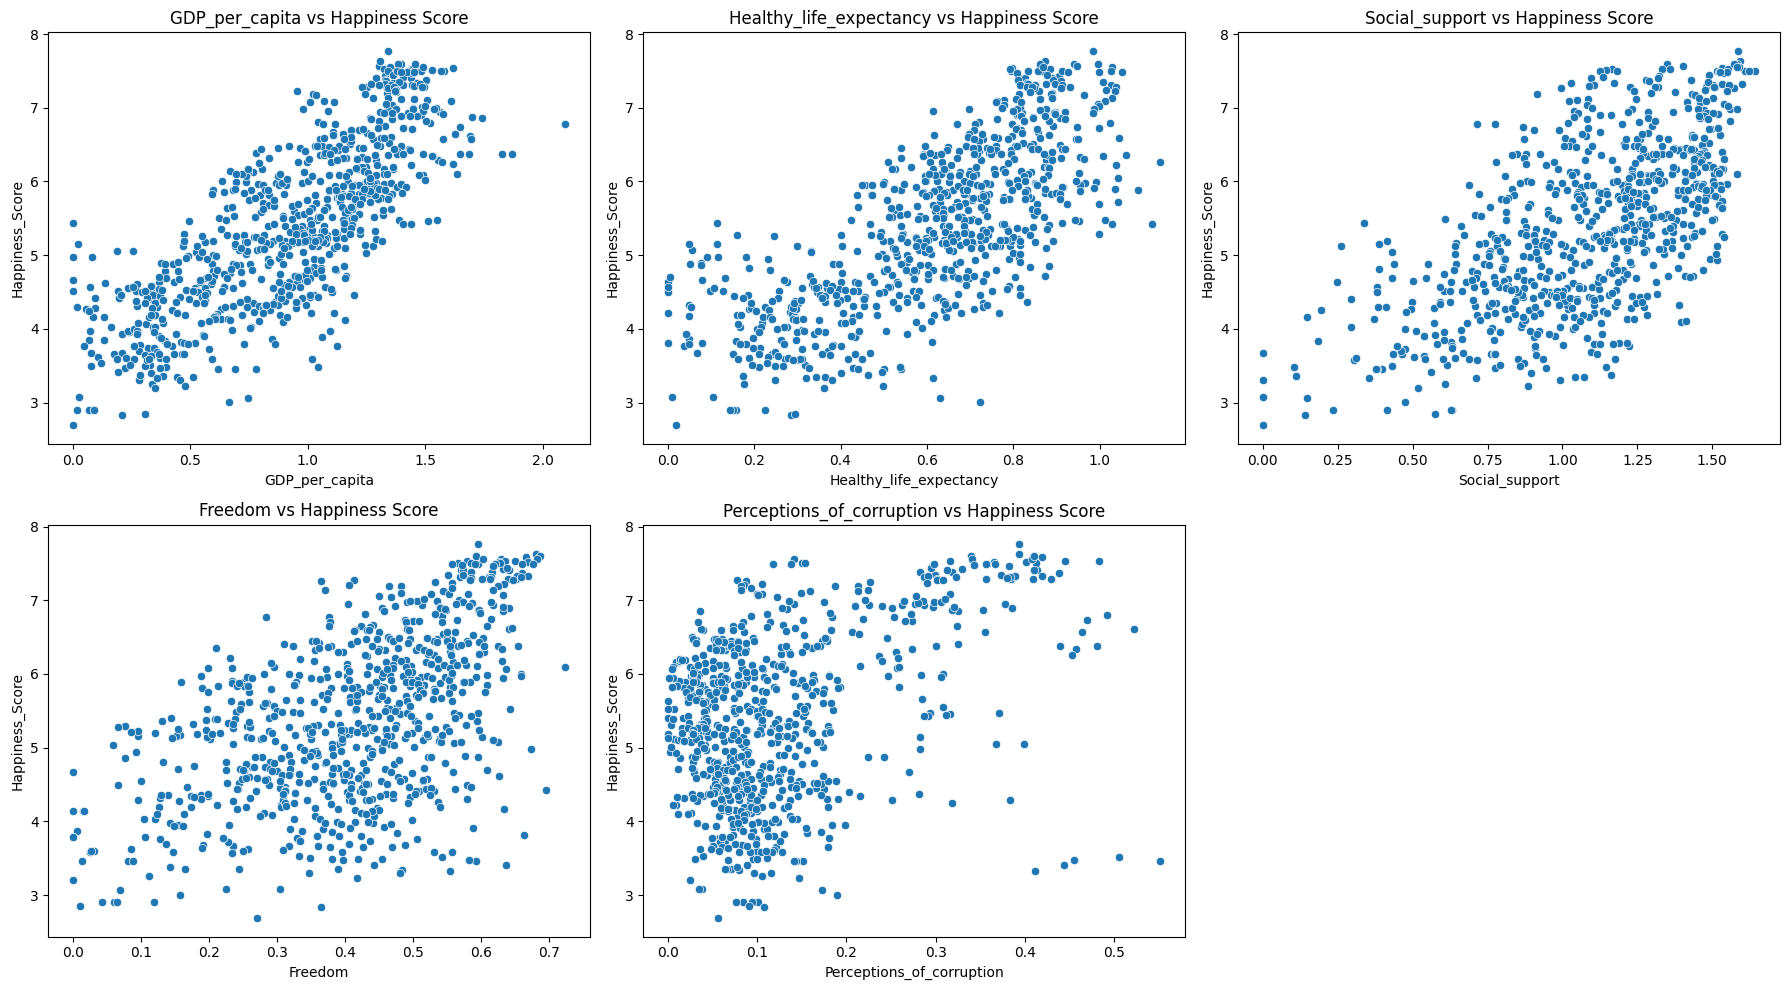

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['GDP_per_capita', 'Healthy_life_expectancy', 'Social_support', 
            'Freedom', 'Perceptions_of_corruption']

# Crear figura con subplots (2 filas x 3 columnas)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # ajusta tamaño si lo deseas
axes = axes.flatten()  # Para iterar fácilmente

# Graficar cada feature
for i, feature in enumerate(features):
    sns.scatterplot(data=df, x=feature, y='Happiness_Score', ax=axes[i])
    axes[i].set_title(f'{feature} vs Happiness Score')

# Eliminar subplot extra si hay menos de 6
if len(features) < len(axes):
    for j in range(len(features), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



In [44]:
import numpy as np

df['GDP_log'] = np.log1p(df['GDP_per_capita'])
df['Support_sqrt'] = np.sqrt(df['Social_support'])
df['Corruption_inv'] = 1 - df['Perceptions_of_corruption']  # percepción de transparencia


In [45]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

# --- 1. Transformaciones ---
df['GDP_log'] = np.log1p(df['GDP_per_capita'])
df['Support_sqrt'] = np.sqrt(df['Social_support'])
df['Corruption_inv'] = 1 - df['Perceptions_of_corruption']

# --- 2. Definir sets de features ---
original_features = ['GDP_per_capita', 'Healthy_life_expectancy', 'Social_support', 
                     'Freedom', 'Perceptions_of_corruption']

transformed_features = ['GDP_log', 'Healthy_life_expectancy', 'Support_sqrt', 
                        'Freedom', 'Corruption_inv']

# --- 3. Función para evaluar modelo ---
def evaluate_model(X, y, name=''):
    model = LinearRegression()
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    r2 = cross_val_score(model, X, y, cv=kf, scoring='r2')
    rmse = -cross_val_score(model, X, y, cv=kf, scoring='neg_root_mean_squared_error')
    print(f'\n{name}')
    print(f'R² promedio: {r2.mean():.4f}')
    print(f'RMSE promedio: {rmse.mean():.4f}')

# --- 4. Variable objetivo ---
y = df['Happiness_Score']

# --- 5. Evaluar modelos ---
X_orig = df[original_features]
X_trans = df[transformed_features]

evaluate_model(X_orig, y, name='Modelo con variables originales')
evaluate_model(X_trans, y, name='Modelo con variables transformadas')



Modelo con variables originales
R² promedio: 0.7550
RMSE promedio: 0.5554

Modelo con variables transformadas
R² promedio: 0.7437
RMSE promedio: 0.5679


In [46]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Función para RMSE
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)

# Función general para evaluar modelos
def evaluate_model(model, X, y, name=''):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    r2 = cross_val_score(model, X, y, cv=kf, scoring='r2')
    rmse = -cross_val_score(model, X, y, cv=kf, scoring=rmse_scorer)
    print(f'\n{name}')
    print(f'R² promedio: {r2.mean():.4f}')
    print(f'RMSE promedio: {rmse.mean():.4f}')

# Definir variables predictoras y objetivo
features = ['GDP_per_capita', 'Healthy_life_expectancy', 'Social_support', 'Freedom', 'Perceptions_of_corruption']
X = df[features]
y = df['Happiness_Score']

# Modelos
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, random_state=42, objective='reg:squarederror')

# Evaluar
evaluate_model(rf_model, X, y, name='Random Forest')
evaluate_model(xgb_model, X, y, name='XGBoost')



Random Forest
R² promedio: 0.7929
RMSE promedio: 0.5112

XGBoost
R² promedio: 0.7544
RMSE promedio: 0.5564


In [47]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt']
}

rf = RandomForestRegressor(random_state=42)
search = RandomizedSearchCV(rf, param_distributions=param_grid, cv=5,
                            n_iter=20, scoring='r2', n_jobs=-1, random_state=42)
search.fit(X, y)
print("Mejores parámetros:", search.best_params_)


c:\Users\Michel Burgos\OneDrive\Documentos\GitHub\ml_exercise1\venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
45 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Michel Burgos\OneDrive\Documentos\GitHub\ml_exercise1\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Michel Burgos\OneDrive\Documentos\GitHub\ml_exercise1\venv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\Michel Burgos\OneDrive\Documentos\GitHu

Mejores parámetros: {'n_estimators': 100, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': None}


In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df[features].copy()
X = add_constant(X)  # Agrega constante para el intercepto

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


ModuleNotFoundError: No module named 'statsmodels'

### Agrupar paises 

In [660]:
# Diccionario de mapeo de países a regiones
region_mapping = {
    'Switzerland': 'Western Europe', 'Iceland': 'Western Europe', 'Denmark': 'Western Europe', 'Norway': 'Western Europe',
    'Finland': 'Western Europe', 'Netherlands': 'Western Europe', 'Sweden': 'Western Europe', 'Austria': 'Western Europe',
    'Luxembourg': 'Western Europe', 'Ireland': 'Western Europe', 'Belgium': 'Western Europe', 'United Kingdom': 'Western Europe',
    'Germany': 'Western Europe', 'France': 'Western Europe', 'Spain': 'Western Europe', 'Malta': 'Western Europe',
    'Italy': 'Western Europe', 'Slovenia': 'Western Europe', 'Portugal': 'Western Europe', 'Greece': 'Western Europe',
    'Canada': 'North America', 'United States': 'North America', 'Puerto Rico': 'North America',
    'New Zealand': 'Australia and New Zealand', 'Australia': 'Australia and New Zealand',
    'Israel': 'Middle East and Northern Africa', 'United Arab Emirates': 'Middle East and Northern Africa',
    'Oman': 'Middle East and Northern Africa', 'Qatar': 'Middle East and Northern Africa', 'Saudi Arabia': 'Middle East and Northern Africa',
    'Kuwait': 'Middle East and Northern Africa', 'Bahrain': 'Middle East and Northern Africa', 'Libya': 'Middle East and Northern Africa',
    'Algeria': 'Middle East and Northern Africa', 'Turkey': 'Middle East and Northern Africa', 'Jordan': 'Middle East and Northern Africa',
    'Morocco': 'Middle East and Northern Africa', 'Tunisia': 'Middle East and Northern Africa', 'Palestinian Territories': 'Middle East and Northern Africa',
    'Iran': 'Middle East and Northern Africa', 'Iraq': 'Middle East and Northern Africa', 'Egypt': 'Middle East and Northern Africa',
    'Yemen': 'Middle East and Northern Africa', 'Lebanon': 'Middle East and Northern Africa', 'Syria': 'Middle East and Northern Africa',
    'Costa Rica': 'Latin America and Caribbean', 'Mexico': 'Latin America and Caribbean', 'Brazil': 'Latin America and Caribbean',
    'Venezuela': 'Latin America and Caribbean', 'Panama': 'Latin America and Caribbean', 'Chile': 'Latin America and Caribbean',
    'Argentina': 'Latin America and Caribbean', 'Uruguay': 'Latin America and Caribbean', 'Colombia': 'Latin America and Caribbean',
    'Suriname': 'Latin America and Caribbean', 'Trinidad and Tobago': 'Latin America and Caribbean', 'El Salvador': 'Latin America and Caribbean',
    'Guatemala': 'Latin America and Caribbean', 'Ecuador': 'Latin America and Caribbean', 'Bolivia': 'Latin America and Caribbean',
    'Paraguay': 'Latin America and Caribbean', 'Nicaragua': 'Latin America and Caribbean', 'Peru': 'Latin America and Caribbean',
    'Jamaica': 'Latin America and Caribbean', 'Dominican Republic': 'Latin America and Caribbean', 'Honduras': 'Latin America and Caribbean',
    'Haiti': 'Latin America and Caribbean', 'Belize': 'Latin America and Caribbean', 'Trinidad & Tobago': 'Latin America and Caribbean',
    'Singapore': 'Southeastern Asia', 'Thailand': 'Southeastern Asia', 'Malaysia': 'Southeastern Asia', 'Indonesia': 'Southeastern Asia',
    'Vietnam': 'Southeastern Asia', 'Philippines': 'Southeastern Asia', 'Laos': 'Southeastern Asia', 'Cambodia': 'Southeastern Asia',
    'Myanmar': 'Southeastern Asia',
    'Czech Republic': 'Central and Eastern Europe', 'Uzbekistan': 'Central and Eastern Europe', 'Slovakia': 'Central and Eastern Europe',
    'Kazakhstan': 'Central and Eastern Europe', 'Moldova': 'Central and Eastern Europe', 'Belarus': 'Central and Eastern Europe',
    'Poland': 'Central and Eastern Europe', 'Croatia': 'Central and Eastern Europe', 'Russia': 'Central and Eastern Europe',
    'North Cyprus': 'Central and Eastern Europe', 'Cyprus': 'Central and Eastern Europe', 'Kosovo': 'Central and Eastern Europe',
    'Turkmenistan': 'Central and Eastern Europe', 'Estonia': 'Central and Eastern Europe', 'Kyrgyzstan': 'Central and Eastern Europe',
    'Azerbaijan': 'Central and Eastern Europe', 'Montenegro': 'Central and Eastern Europe', 'Romania': 'Central and Eastern Europe',
    'Serbia': 'Central and Eastern Europe', 'Latvia': 'Central and Eastern Europe', 'Macedonia': 'Central and Eastern Europe',
    'Albania': 'Central and Eastern Europe', 'Bosnia and Herzegovina': 'Central and Eastern Europe', 'Hungary': 'Central and Eastern Europe',
    'Ukraine': 'Central and Eastern Europe', 'Bulgaria': 'Central and Eastern Europe', 'Armenia': 'Central and Eastern Europe',
    'Georgia': 'Central and Eastern Europe', 'Tajikistan': 'Central and Eastern Europe', 'Northern Cyprus': 'Central and Eastern Europe',
    'North Macedonia': 'Central and Eastern Europe',
    'Taiwan': 'Eastern Asia', 'Japan': 'Eastern Asia', 'South Korea': 'Eastern Asia', 'Hong Kong': 'Eastern Asia',
    'China': 'Eastern Asia', 'Mongolia': 'Eastern Asia', 'Taiwan Province of China': 'Eastern Asia',
    'Hong Kong S.A.R., China': 'Eastern Asia',
    'Nigeria': 'Sub-Saharan Africa', 'Zambia': 'Sub-Saharan Africa', 'Mozambique': 'Sub-Saharan Africa', 'Lesotho': 'Sub-Saharan Africa',
    'Swaziland': 'Sub-Saharan Africa', 'South Africa': 'Sub-Saharan Africa', 'Ghana': 'Sub-Saharan Africa', 'Zimbabwe': 'Sub-Saharan Africa',
    'Liberia': 'Sub-Saharan Africa', 'Sudan': 'Sub-Saharan Africa', 'Congo (Kinshasa)': 'Sub-Saharan Africa', 'Ethiopia': 'Sub-Saharan Africa',
    'Sierra Leone': 'Sub-Saharan Africa', 'Mauritania': 'Sub-Saharan Africa', 'Kenya': 'Sub-Saharan Africa', 'Djibouti': 'Sub-Saharan Africa',
    'Botswana': 'Sub-Saharan Africa', 'Malawi': 'Sub-Saharan Africa', 'Cameroon': 'Sub-Saharan Africa', 'Angola': 'Sub-Saharan Africa',
    'Mali': 'Sub-Saharan Africa', 'Congo (Brazzaville)': 'Sub-Saharan Africa', 'Comoros': 'Sub-Saharan Africa', 'Uganda': 'Sub-Saharan Africa',
    'Senegal': 'Sub-Saharan Africa', 'Gabon': 'Sub-Saharan Africa', 'Niger': 'Sub-Saharan Africa', 'Tanzania': 'Sub-Saharan Africa',
    'Madagascar': 'Sub-Saharan Africa', 'Central African Republic': 'Sub-Saharan Africa', 'Chad': 'Sub-Saharan Africa',
    'Guinea': 'Sub-Saharan Africa', 'Ivory Coast': 'Sub-Saharan Africa', 'Burkina Faso': 'Sub-Saharan Africa', 'Rwanda': 'Sub-Saharan Africa',
    'Benin': 'Sub-Saharan Africa', 'Burundi': 'Sub-Saharan Africa', 'Togo': 'Sub-Saharan Africa', 'Mauritius': 'Sub-Saharan Africa',
    'Somalia': 'Sub-Saharan Africa', 'Namibia': 'Sub-Saharan Africa', 'South Sudan': 'Sub-Saharan Africa', 'Somaliland Region': 'Sub-Saharan Africa',
    'Gambia': 'Sub-Saharan Africa',
    'Bhutan': 'Southern Asia', 'Pakistan': 'Southern Asia', 'Bangladesh': 'Southern Asia', 'India': 'Southern Asia',
    'Nepal': 'Southern Asia', 'Sri Lanka': 'Southern Asia', 'Afghanistan': 'Southern Asia', 'Lithuania': 'Central and Eastern Europe', 'Somaliland region': 'Sub-Saharan Africa'
}

# Agregar columna Region
df['Region'] = df['Country_or_region'].map(region_mapping)

# Verificar
print("Regiones únicas:", df['Region'].unique())
print("Distribución de regiones:\n", df['Region'].value_counts())

Regiones únicas: ['Western Europe' 'North America' 'Australia and New Zealand'
 'Middle East and Northern Africa' 'Latin America and Caribbean'
 'Southeastern Asia' 'Central and Eastern Europe' 'Eastern Asia'
 'Sub-Saharan Africa' 'Southern Asia']
Distribución de regiones:
 Region
Sub-Saharan Africa                 196
Central and Eastern Europe         150
Latin America and Caribbean        110
Western Europe                     100
Middle East and Northern Africa     96
Southeastern Asia                   44
Southern Asia                       35
Eastern Asia                        30
North America                       11
Australia and New Zealand           10
Name: count, dtype: int64


In [159]:
null_values= df.isnull().sum()
print("Valores nulos:\n", null_values)

Valores nulos:
 Freedom                      0
Generosity                   0
Happiness_Rank               0
Country_or_region            0
Perceptions_of_corruption    0
GDP_per_capita               0
Healthy_life_expectancy      0
Happiness_Score              0
Social_support               0
Year                         0
Economic_Health_Index        0
Region                       0
dtype: int64


In [160]:
df = df.drop("Country_or_region", axis=1)


In [161]:
df.head()

,Freedom,Generosity,Happiness_Rank,Perceptions_of_corruption,GDP_per_capita,Healthy_life_expectancy,Happiness_Score,Social_support,Year,Economic_Health_Index,Region
0,0.66557,0.29678,1,0.41978,1.39651,0.94143,7.587,1.34951,2015,1.772106,Western Europe
1,0.62877,0.43630,2,0.14145,1.30232,0.94784,7.561,1.40223,2015,1.626761,Western Europe
2,0.64938,0.34139,3,0.48357,1.32548,0.87464,7.527,1.36058,2015,1.458406,Western Europe
3,0.66973,0.34699,4,0.36503,1.45900,0.88521,7.522,1.33095,2015,1.720453,Western Europe
4,0.63297,0.45811,5,0.32957,1.32629,0.90563,7.427,1.32261,2015,1.548120,North America


### Codificar Region con One-Hot Encoding

In [162]:
categorical_cols = ['Region', 'Year']
# Filtramos solo las columnas que existen en el DataFrame
columns_to_encode = [col for col in categorical_cols if col in df.columns]

# Usamos get_dummies con los prefijos correctamente asignados
df = pd.get_dummies(df, columns=columns_to_encode, 
                    prefix=[f'Region_{col}' if col == 'Region' else 
                            f'_{col}' for col in columns_to_encode])

print("Categóricas codificadas con One-Hot Encoding:", columns_to_encode)

Categóricas codificadas con One-Hot Encoding: ['Region', 'Year']


In [163]:
df.head()

,Freedom,Generosity,Happiness_Rank,Perceptions_of_corruption,GDP_per_capita,Healthy_life_expectancy,Happiness_Score,Social_support,Economic_Health_Index,Region_Region_Australia and New Zealand,...,Region_Region_North America,Region_Region_Southeastern Asia,Region_Region_Southern Asia,Region_Region_Sub-Saharan Africa,Region_Region_Western Europe,_Year_2015,_Year_2016,_Year_2017,_Year_2018,_Year_2019
0,0.66557,0.29678,1,0.41978,1.39651,0.94143,7.587,1.34951,1.772106,False,...,False,False,False,False,True,True,False,False,False,False
1,0.62877,0.43630,2,0.14145,1.30232,0.94784,7.561,1.40223,1.626761,False,...,False,False,False,False,True,True,False,False,False,False
2,0.64938,0.34139,3,0.48357,1.32548,0.87464,7.527,1.36058,1.458406,False,...,False,False,False,False,True,True,False,False,False,False
3,0.66973,0.34699,4,0.36503,1.45900,0.88521,7.522,1.33095,1.720453,False,...,False,False,False,False,True,True,False,False,False,False
4,0.63297,0.45811,5,0.32957,1.32629,0.90563,7.427,1.32261,1.548120,False,...,True,False,False,False,False,True,False,False,False,False


### Codificar booleanas

In [358]:
# Identificar todas las columnas booleanas
boolean_cols = df.select_dtypes(include='bool').columns.tolist()

# Convertirlas a enteros (0 y 1)
df[boolean_cols] = df[boolean_cols].astype(int)

print("Booleanas codificadas a enteros (1/0):", boolean_cols)

Booleanas codificadas a enteros (1/0): ['Year_2015', 'Year_2016', 'Year_2017', 'Year_2018', 'Year_2019']


In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 15 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Economic_Health_Index                         782 non-null    float64
 1   Social_support                                782 non-null    float64
 2   Freedom                                       782 non-null    float64
 3   Perceptions_of_corruption_boxcox              782 non-null    float64
 4   Country_Avg_Happiness                         612 non-null    float64
 5   Country_Avg_Perceptions_of_corruption_boxcox  612 non-null    float64
 6   Region_Avg_Happiness                          772 non-null    float64
 7   Region_Avg_Perceptions_of_corruption_boxcox   772 non-null    float64
 8   Economic_Social_Interaction                   782 non-null    float64
 9   Year_2015                                     782 non-null    int

### Eliminar columnas innecesarias 

### Guardar el dataset final

In [572]:
df.to_csv('../data/clean_dataset.csv', index=False)
print("\nGuardado en 'data/clean_dataset.csv'")


Guardado en 'data/clean_dataset.csv'
